<a href="https://colab.research.google.com/github/Boshra-01/Heart-Disease-Prediction-ML/blob/main/Heart_Disease_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set Description:
01. age
02. sex (1 = male; 0 = female)
03. cp: chest pain type
  *   1: typical angina
  *   2: atypical angina
  *   3: non-anginal pain
  *   4: asymptomatic
04. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
05. chol: serum cholestoral in mg/dl
06. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
07. restecg: resting electrocardiographic results
  *   0: normal
  *   1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  *   2: showing probable or definite left ventricular hypertrophy by Estes' criteria
08. thalach: maximum heart rate achieved
09. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
 *   1: upsloping
 *   2: flat
 *   3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
 *   0: < 50% diameter narrowing
 *   1: > 50% diameter narrowing



In [ ]:
# import library..
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.cluster as cluster
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz
# import the library
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# read the data set
myFile= pd.read_csv("heart.xls")

In [ ]:
myFile.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
print(myFile.shape)

(1025, 14)


In [ ]:
myFile = myFile[myFile.ca != 4]

In [ ]:
myFile = myFile[myFile.thal != 0]

In [ ]:
print(myFile.shape)

(1000, 14)


In [ ]:
myFile.thal.value_counts()

2    533
3    403
1     64
Name: thal, dtype: int64

In [ ]:
myFile.ca.value_counts()

0    571
1    226
2    134
3     69
Name: ca, dtype: int64

In [ ]:
myFile.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,0.691000,0.934000,131.592000,246.996000,0.146000,0.52400,148.977000,0.338000,1.092400,1.381000,0.701000,2.339000,0.508000
std,9.037822,0.462312,1.031847,17.714326,51.700802,0.353283,0.52887,23.083139,0.473265,1.180727,0.619857,0.944718,0.593659,0.500186
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.00000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.00000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.00000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Finding co relation

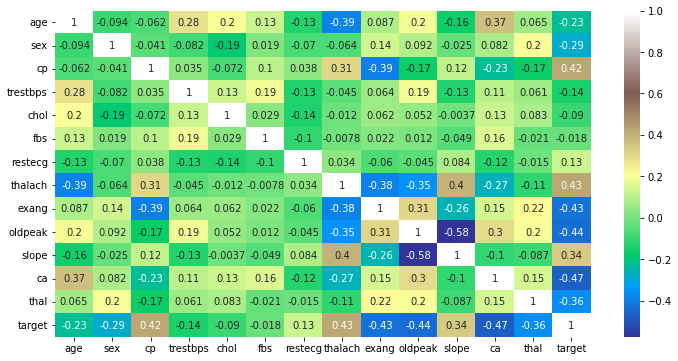

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(myFile.corr(), annot= True, cmap='terrain')

In [ ]:
myFile.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094017,-0.062035,0.281774,0.204699,0.131792,-0.127133,-0.385332,0.087253,0.196117,-0.159610,0.365137,0.065341,-0.226825
sex,-0.094017,1.000000,-0.040696,-0.081780,-0.192823,0.019085,-0.069942,-0.063794,0.139273,0.091967,-0.025398,0.081613,0.203336,-0.285822
cp,-0.062035,-0.040696,1.000000,0.034560,-0.071551,0.103347,0.037757,0.306562,-0.390883,-0.167036,0.116042,-0.227693,-0.167702,0.423833
trestbps,0.281774,-0.081780,0.034560,1.000000,0.132143,0.188513,-0.127277,-0.044567,0.064345,0.191291,-0.126402,0.105693,0.061044,-0.143221
chol,0.204699,-0.192823,-0.071551,0.132143,1.000000,0.028859,-0.136328,-0.011586,0.061830,0.051636,-0.003669,0.129070,0.082655,-0.089647
fbs,0.131792,0.019085,0.103347,0.188513,0.028859,1.000000,-0.104493,-0.007812,0.021864,0.011542,-0.048572,0.157921,-0.021449,-0.017946
restecg,-0.127133,-0.069942,0.037757,-0.127277,-0.136328,-0.104493,1.000000,0.034114,-0.060437,-0.044912,0.083531,-0.122861,-0.014781,0.127930
thalach,-0.385332,-0.063794,0.306562,-0.044567,-0.011586,-0.007812,0.034114,1.000000,-0.384681,-0.350771,0.395745,-0.266230,-0.109439,0.426872
exang,0.087253,0.139273,-0.390883,0.064345,0.061830,0.021864,-0.060437,-0.384681,1.000000,0.309848,-0.258572,0.145665,0.218821,-0.425839
oldpeak,0.196117,0.091967,-0.167036,0.191291,0.051636,0.011542,-0.044912,-0.350771,0.309848,1.000000,-0.575127,0.296165,0.204037,-0.435157


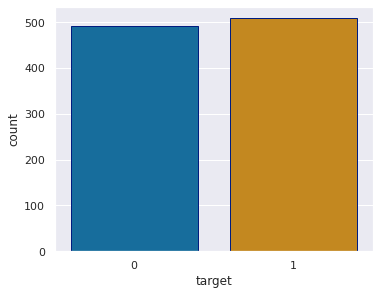

In [ ]:
sns.countplot(x='target',data=myFile,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))
sns.set(rc={'figure.figsize':(5.7,4.50)})

Some comparisn

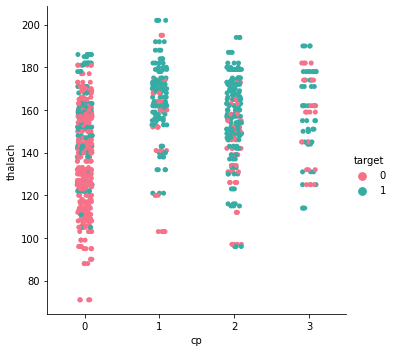

In [ ]:
sns.catplot(data= myFile, x='cp', y='thalach', hue= 'target', palette='husl')

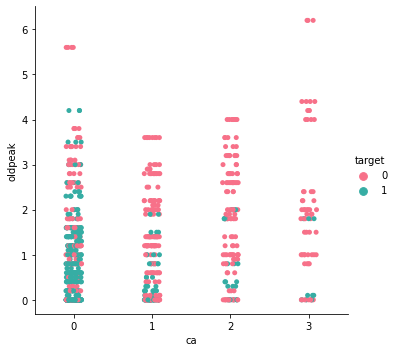

In [ ]:
sns.catplot(data= myFile, x='ca', y='oldpeak', hue= 'target', palette='husl')

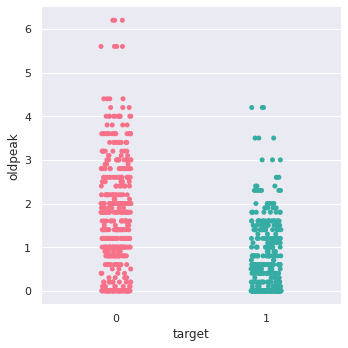

In [ ]:
sns.catplot(data= myFile, x='target', y='oldpeak', palette='husl')

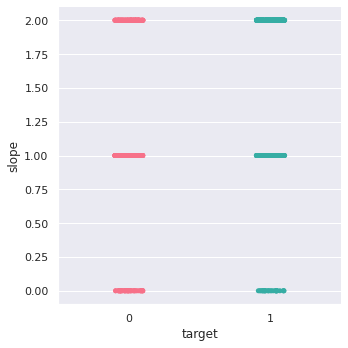

In [ ]:
sns.catplot(data= myFile, x='target', y='slope', palette='husl')

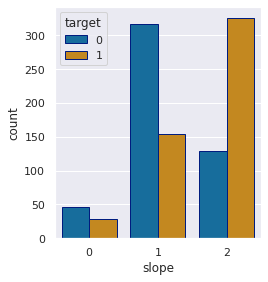

In [ ]:
sns.countplot(x='slope', hue='target',data=myFile,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

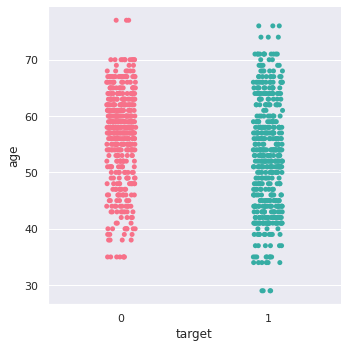

In [ ]:
sns.catplot(data= myFile, x='target', y='age', palette='husl')

Most two positively co related

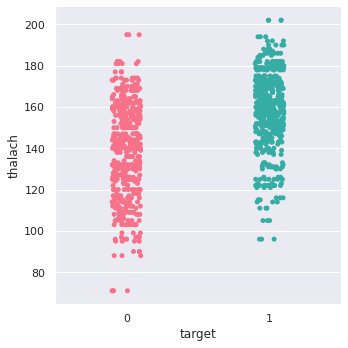

In [ ]:
sns.catplot(data= myFile, x='target', y='thalach', palette='husl')

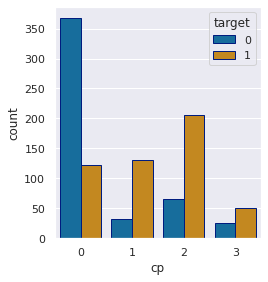

In [ ]:
sns.countplot(x='cp', hue='target',data=myFile,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))
sns.set(rc={'figure.figsize':(8.7,4.26)})

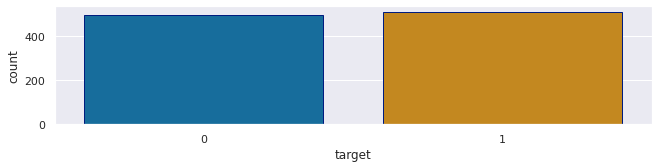

most two negatively co related

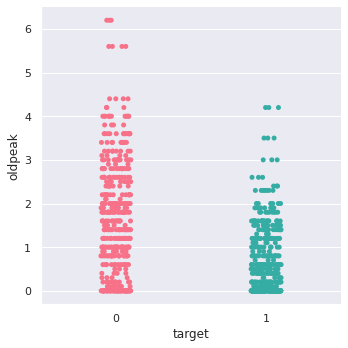

In [ ]:
sns.catplot(data= myFile, x='target', y='oldpeak', palette='husl')

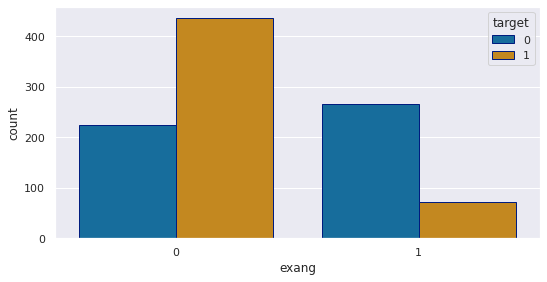

In [ ]:
sns.countplot(x='exang', hue='target',data=myFile,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))
sns.set(rc={'figure.figsize':(10.7,4.27)})

In [ ]:
x= myFile.iloc[:,:-1]

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
y= myFile['target']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x,y, test_size= 0.3, random_state=42)

# Decission Tree

In [ ]:
dt_model= DecisionTreeClassifier()

In [ ]:
dt_model.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
print("Decission Tree Result: ")
print(f'Traning Accuracy - : {dt_model.score(Xtrain,Ytrain)*100:.3f} %')
print(f'Testing Accuracy - : {dt_model.score(Xtest,Ytest)*100:.3f} %')

Decission Tree Result: 
Traning Accuracy - : 100.000 %
Testing Accuracy - : 100.000 %


Confusion matrix for decission tree

In [ ]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, dt_model.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, dt_model.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[333   0]
 [  0 367]]

Confusion Matrix for testing Score: 
 [[159   0]
 [  0 141]]



Performance matrix of decision tree

In [ ]:
print(classification_report(Ytest, dt_model.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       141

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Performance matrix of decision tree visualization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


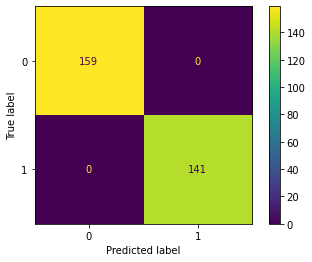

In [ ]:
plot_confusion_matrix(dt_model, Xtest, Ytest)
plt.show()

draw decission tree graph

In [ ]:
dot_data= export_graphviz(dt_model, max_depth=3, out_file=None, feature_names=x.columns,class_names=['Yes','No'],filled=True,rounded=True,special_characters=True)

In [ ]:
graph= graphviz.Source(dot_data)

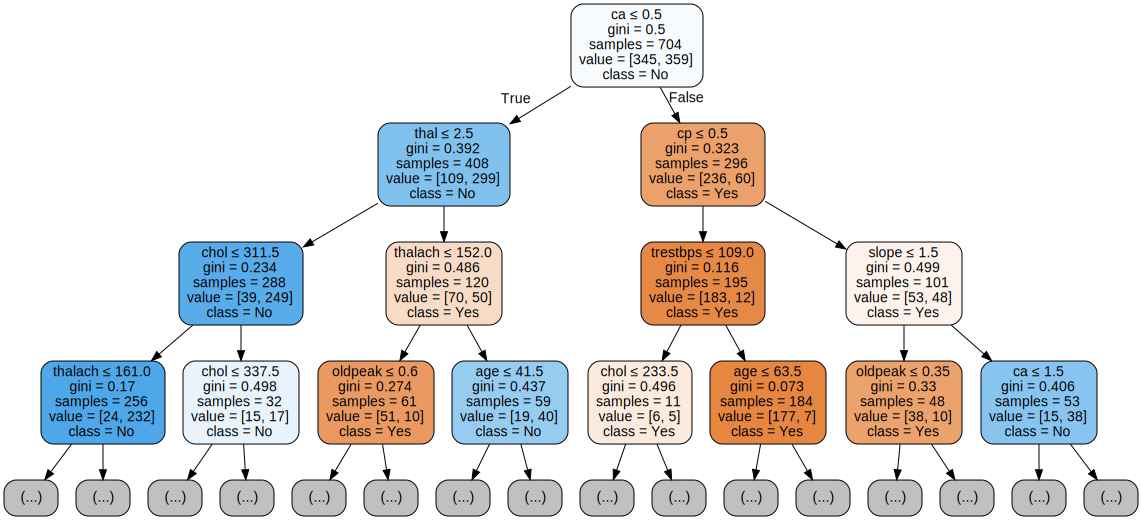

In [ ]:
graph

# K- nearest neighbors Algorithm

In [ ]:
knn= KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(f"Training Accuracy Score: {accuracy_score(Ytrain, knn.predict(Xtrain)) * 100:.3f}%")
print(f"Testing Accuracy Score: {accuracy_score(Ytest, knn.predict(Xtest)) * 100:.3f}%")

Training Accuracy Score: 97.571%
Testing Accuracy Score: 86.333%


Confusion matrix for KNN

In [ ]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, knn.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, knn.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[324   9]
 [  8 359]]

Confusion Matrix for testing Score: 
 [[137  22]
 [ 19 122]]



Performance matrix

In [ ]:
print(classification_report(Ytest, knn.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       159
           1       0.85      0.87      0.86       141

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


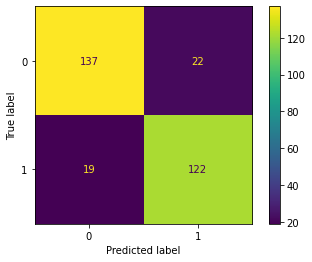

In [ ]:
plot_confusion_matrix(knn, Xtest, Ytest)
plt.show()

# Naive Bayes

In [ ]:
gnv= GaussianNB()

In [ ]:
gnv.fit(Xtrain,Ytrain)

GaussianNB()

In [ ]:
print(f"Training Accuracy Score: {gnv.score(Xtrain, Ytrain) * 100:.3f}%")
print(f"Testing Accuracy Score: {gnv.score(Xtest,Ytest) * 100:.3f}%")

Training Accuracy Score: 83.857%
Testing Accuracy Score: 82.667%


Confusion matrix of Naive bayes

In [ ]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, gnv.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, gnv.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[262  71]
 [ 42 325]]

Confusion Matrix for testing Score: 
 [[124  35]
 [ 17 124]]



Performance matrix

In [ ]:
print(classification_report(Ytest, gnv.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       159
           1       0.78      0.88      0.83       141

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


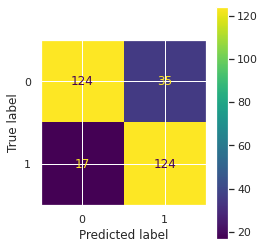

In [ ]:
plot_confusion_matrix(gnv, Xtest, Ytest)
plt.show()

# Support vector Machine -> SVM

In [ ]:
m_svm= SVC()

In [ ]:
m_svm.fit(Xtrain,Ytrain)

SVC()

In [ ]:
print(f"Training Accuracy Score: {m_svm.score(Xtrain, Ytrain) * 100:.3f}%")
print(f"Testing Accuracy Score: {m_svm.score(Xtest,Ytest) * 100:.3f}%")

Training Accuracy Score: 70.857%
Testing Accuracy Score: 72.333%


Confusion matrix of SVM

In [ ]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, m_svm.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, m_svm.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[178 155]
 [ 73 294]]

Confusion Matrix for testing Score: 
 [[ 90  69]
 [ 26 115]]



Performance matrix

In [ ]:
print(classification_report(Ytest, m_svm.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.78      0.57      0.65       159
           1       0.62      0.82      0.71       141

    accuracy                           0.68       300
   macro avg       0.70      0.69      0.68       300
weighted avg       0.70      0.68      0.68       300



# Random Forest

In [ ]:
rf_model= RandomForestClassifier()

In [ ]:
rf_model.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [ ]:
# Make predictions for the test set
y_pred_test = rf_model.predict(Xtest)

In [ ]:
# View accuracy score
accuracy_score(Ytest, y_pred_test)

1.0

In [ ]:
print(f"Training Accuracy Score: {rf_model.score(Xtrain,Ytrain)*100:.3f} %")
print(f"Testing Accuracy Score: {rf_model.score(Xtest,Ytest)*100:.3f} %")

Training Accuracy Score: 100.000 %
Testing Accuracy Score: 100.000 %


Confusion matrix of Random Forest

In [ ]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, rf_model.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, rf_model.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[333   0]
 [  0 367]]

Confusion Matrix for testing Score: 
 [[159   0]
 [  0 141]]



Performance matrix

In [ ]:
print(classification_report(Ytest, rf_model.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       141

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Performance matrix of Random Forest visualization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


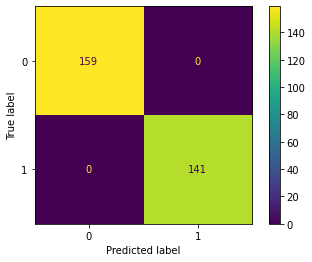

In [ ]:
plot_confusion_matrix(rf_model, Xtest, Ytest)
plt.show()

draw to observe and predicted data

In [ ]:
plt.rcParams['figure.figsize'] = (30,6)
x_ax= range(len(Xtest))

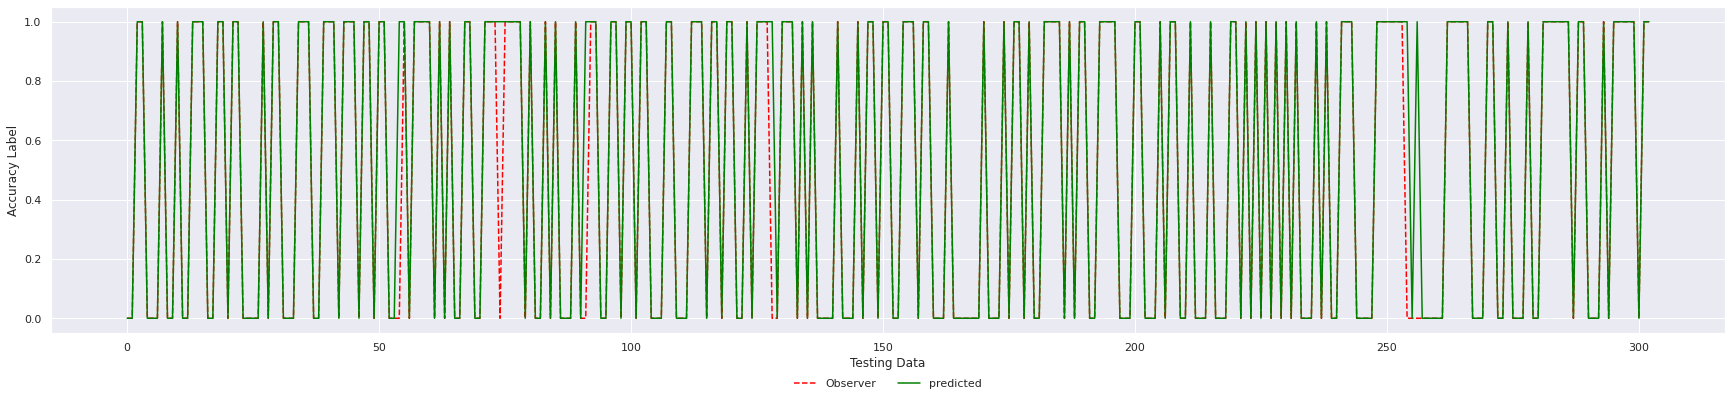

In [ ]:
from matplotlib.patches import bbox_artist
plt.plot(x_ax, Ytest, label = 'Observer', color = 'red', linestyle = '--')
plt.plot(x_ax, y_pred_test, label = 'predicted', color = 'green', linestyle = '-')
plt.ylabel('Accuracy Label')
plt.xlabel("Testing Data")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center',ncol =2, frameon = False)